In [1]:
import sys
import os

# Go 2 levels up from /notebooks/by-step exploration/ to the project root
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))


In [2]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from src.preprocessing import preprocess_data
from src.models import train_classification_models
import pandas as pd

c:\Users\Lenovo\anaconda3\envs\churn_env\python312.zip
c:\Users\Lenovo\anaconda3\envs\churn_env\DLLs
c:\Users\Lenovo\anaconda3\envs\churn_env\Lib
c:\Users\Lenovo\anaconda3\envs\churn_env

c:\Users\Lenovo\anaconda3\envs\churn_env\Lib\site-packages
c:\Users\Lenovo\anaconda3\envs\churn_env\Lib\site-packages\win32
c:\Users\Lenovo\anaconda3\envs\churn_env\Lib\site-packages\win32\lib
c:\Users\Lenovo\anaconda3\envs\churn_env\Lib\site-packages\Pythonwin
c:\Users\Lenovo\Customer-Churn-Prediction-Segmentation


In [3]:
# Load and prepare data
df = pd.read_csv('../../data/customer_data.csv')
X, y, X_scaled = preprocess_data(df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = train_classification_models(X_train, y_train)


c:\Users\Lenovo\anaconda3\envs\churn_env\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


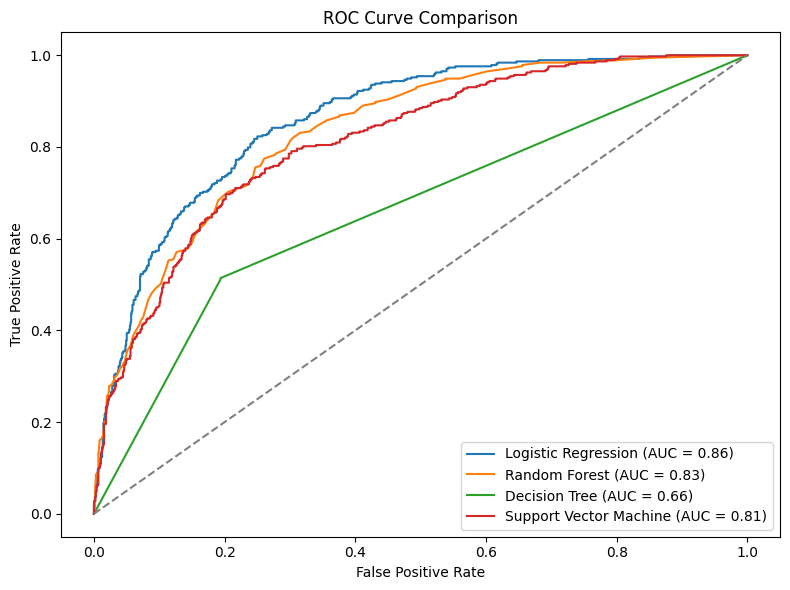

In [4]:
# Evaluate with ROC curve
plt.figure(figsize=(8, 6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()
